    fips  unemp                 names
0      1   5.63                 AZUAY
1      2   4.30               BOLIVAR
2      3   3.20                 CAÑAR
3      4   3.20                CARCHI
4      5   2.90              COTOPAXI
5      6   1.50            CHIMBORAZO
6      7   3.20                EL ORO
7      8   7.20            ESMERALDAS
8      9  10.40                GUAYAS
9     10   4.50              IMBABURA
10    11   2.70                  LOJA
11    12   4.12              LOS RIOS
12    13   8.90                MANABI
13    14   2.00       MORONA SANTIAGO
14    15   1.70                  NAPO
15    16   4.60               PASTAZA
16    18   8.60            TUNGURAHUA
17    17  11.60             PICHINCHA
18    19   1.90      ZAMORA CHINCHIPE
19    20   2.50             GALAPAGOS
20    21   4.10             SUCUMBIOS
21    22   3.20              ORELLANA
22    23   5.20         SANTO DOMINGO
23    24   6.45           SANTA ELENA
24    90  10.51  ZONAS NO DELIMITADAS


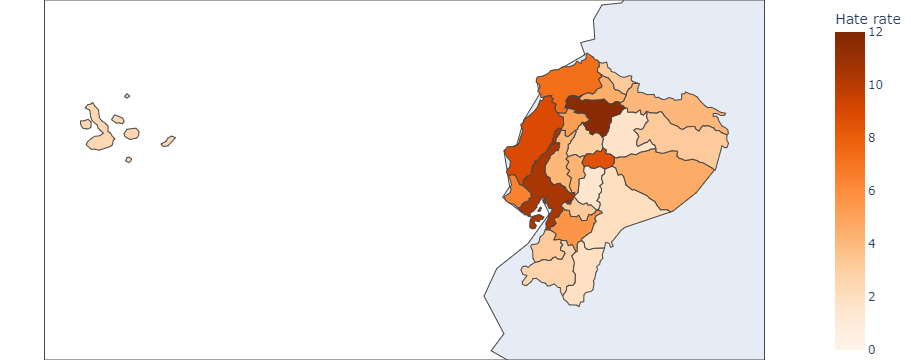

In [10]:
import json
import requests
import pandas as pd
import numpy as np
import plotly.express as px


polygons = requests.get(
    "https://raw.githubusercontent.com/jpmarindiaz/geo-collection/master/ecu/ecuador.geojson").json()

name_cantones  =  []
for i, a in enumerate(polygons['features']):
    name_cantones.append(a['properties']['nombre'])

id_pro = list(range(1, 25, 1))
id_pro.append(90)

id_pro_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 17, 19, 20, 21, 22, 23, 24, 90]
hate = [5.63, 4.3, 3.2, 3.2, 2.9, 1.5, 3.2, 7.2, 10.4, 4.5, 2.7, 4.12, 8.9, 2.0, 1.7, 4.6, 8.6, 11.6, 1.9, 2.5, 4.1, 3.2, 5.2, 6.45, 10.51]

df = pd.DataFrame(
    {"fips": id_pro_, "unemp": hate, "names": name_cantones}
)

print(df)
    
fig = px.choropleth(
    df,
    geojson=polygons,
    locations="fips",
    featureidkey="properties.codigo",
    color="unemp",
    color_continuous_scale="Oranges",
    range_color=(0, 12),
    # scope="europe",
    hover_name = "names",
    #hover_data = ["names"],
    labels={"unemp": "Hate rate"},
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.update_geos(fitbounds="locations", visible=True)
fig.show()